In [18]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [19]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [21]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

june_filter = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6)

# Preview first 10 items
# print(june_filter[1:11])

In [22]:
#  3. Convert the June temperatures to a list.
    # .all() outputs a list - though this step is relatively redundant based on how the query above was constructed
june_filter = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [23]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
import pandas as pd

june_temps_df = pd.DataFrame(june_filter,columns=["June Temps"])
june_temps_df.head()

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [24]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [25]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_filter = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12)

# Preview first 10 items
print(dec_filter[1:11])

[(74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,)]


In [26]:
# 7. Convert the December temperatures to a list.
dec_filter = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()


In [27]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_filter,columns=["December Temps"])
dec_temps_df.head()

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [28]:
# 9. Calculate and print out the summary statistics for the December temperature DataFrame.
dec_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


### The following cells contain additional calculations to support analysis in the project summary
---

In [29]:
df_combined = dec_temps_df.join(june_temps_df,how='outer')
df_combined.describe()

,December Temps,June Temps
count,1517.000000,1700.000000
mean,71.041529,74.944118
std,3.745920,3.257417
min,56.000000,64.000000
25%,69.000000,73.000000
50%,71.000000,75.000000
75%,74.000000,77.000000
max,83.000000,85.000000


<Figure size 432x288 with 0 Axes>

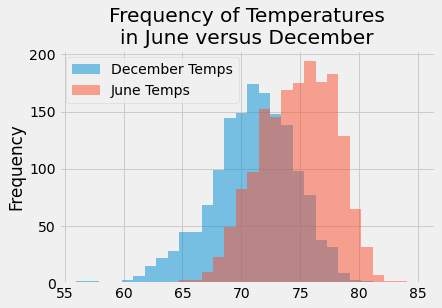

In [37]:
# Additional computation for challenge analysis
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

fig = plt.figure()
ax = df_combined.plot.hist(bins=30,alpha=.5)
plt.title("Frequency of Temperatures\nin June versus December")
plt.savefig('Resources/output.png',bbox_inches='tight')

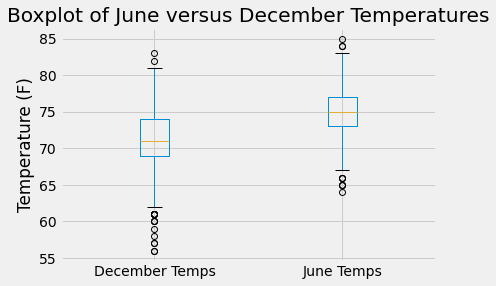

In [38]:

fig1 = plt.figure()
ax1 = df_combined.boxplot()
plt.title("Boxplot of June versus December Temperatures")
plt.ylabel("Temperature (F)")
plt.savefig('Resources/output2.png',bbox_inches='tight')